In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from data_boxscore.data import load_dataframes
from data_boxscore.elo import compute_ELO, compute_kl_divergence
from data_boxscore.constants import features_minmax, features_no_scaling, features_perc, features_robust, features_standard
%reload_ext autoreload
%autoreload 2


In [2]:
gdf, X_train, y_train, X_val, y_val, X_test, y_test, _, _ = load_dataframes(filename='data.csv',
                                                                    features_standard = features_standard, 
                                                                    features_minmax = features_minmax, 
                                                                    features_robust = features_robust, 
                                                                    features_perc = features_perc,
                                                                    features_no_scaling = features_no_scaling,              
                                                                    use_ELO = True,
                                                                    k_elo = 20)
print(gdf.shape, X_train.shape, X_val.shape ,X_test.shape, )
gdf['home_win'].mean()

(2058, 169) (1042, 161) (328, 161) (328, 161)


0.6963070942662779

In [3]:
gdf.head()

,game_id,home_Team,away_Team,Diff_Score,Championship,Year,Phase,league_id,gameday,season_half,...,away_Pourc_penal_def,away_Pourc_penal_hors_jeu,away_Nb_carton_jaune,away_Nb_carton_rouge,away_tps_poss_22_adv,away_tps_poss_22,away_Nb_rucks_3_,home_win,split,ELO_diff_before
0,0,Zebre,Sigma Lions,-12,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,56,11,1,0,98,191,4,0,0,0.0
1,1,Ulster,Glasgow,6,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,64,0,1,0,639,199,57,1,0,0.0
2,2,Cardiff,Connacht,12,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,89,0,2,0,41,176,7,1,0,0.0
3,3,Benetton Rugby Trevise,DHL Stormers,3,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,70,10,0,0,31,108,8,1,0,0.0
4,4,Edimbourg,Scarlets,4,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,25,50,0,0,361,176,18,1,0,0.0


In [4]:
gdf, elo_end = compute_ELO(gdf, k_elo=20, return_elo_end=True)
gdf

,game_id,home_Team,away_Team,Diff_Score,Championship,Year,Phase,league_id,gameday,season_half,...,away_Pourc_penal_def,away_Pourc_penal_hors_jeu,away_Nb_carton_jaune,away_Nb_carton_rouge,away_tps_poss_22_adv,away_tps_poss_22,away_Nb_rucks_3_,home_win,split,ELO_diff_before
0,0,Zebre,Sigma Lions,-12,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,56,11,1,0,98,191,4,0,0,0.000000
1,1,Ulster,Glasgow,6,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,64,0,1,0,639,199,57,1,0,0.000000
2,2,Cardiff,Connacht,12,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,89,0,2,0,41,176,7,1,0,0.000000
3,3,Benetton Rugby Trevise,DHL Stormers,3,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,70,10,0,0,31,108,8,1,0,0.000000
4,4,Edimbourg,Scarlets,4,UNITEDCHAMPIONSHIP,2021_2022,Season,1,1,2021_2022_1,...,25,50,0,0,361,176,18,1,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2302,Bath rugby,Northampton Saints,31,PREMIERSHIP,2023_2024,Season,15,18,2023_2024_2,...,33,0,0,0,317,59,28,1,3,-112.015672
2054,2303,Gloucester rugby,Newcastle Falcons,40,PREMIERSHIP,2023_2024,Season,15,18,2023_2024_2,...,56,11,1,0,360,91,27,1,3,110.947001
2055,2304,Harlequins,Bristol Bears,-25,PREMIERSHIP,2023_2024,Season,15,18,2023_2024_2,...,33,11,0,0,265,94,52,0,3,12.822873
2056,2305,Leicester Tigers,Exeter Chiefs,18,PREMIERSHIP,2023_2024,Season,15,18,2023_2024_2,...,90,20,3,0,235,226,75,1,3,18.114916


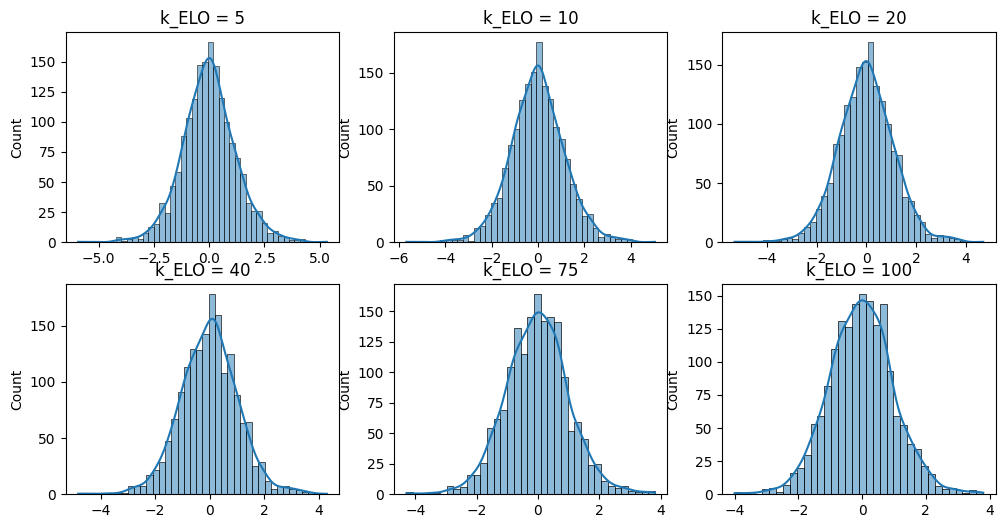

In [7]:
fig, axs = plt.subplots(2,3, figsize = (12,6))
for i,k_elo in enumerate([5,10,20,40,75,100]):
    df = compute_ELO(gdf, k_elo)
    train_data = df[df['split'] == 1]['ELO_diff_before'].values.reshape(-1,1)
    data = df[df['split'] != 0]['ELO_diff_before'].values.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(train_data)
    data = scaler.transform(data)
    sns.histplot(data, kde = True,ax = axs[i//3, i%3], legend=False)
    axs[i//3, i%3].set_title(f"k_ELO = {k_elo}")    
    
    

In [9]:
elos = {}
for k_elo in range(5,101,5):
    df = compute_ELO(gdf, k_elo)
    train_data = df[df['split'] == 1]['ELO_diff_before'].values.reshape(-1,1)
    data = df[df['split'] != 0]['ELO_diff_before'].values.reshape(-1,1)
    scaler = StandardScaler()
    scaler.fit(train_data)
    data = scaler.transform(data)
    elos[k_elo] = data

In [12]:
kls = []
for k,v in elos.items():
    tmp = {}
    for k2,v2 in elos.items():
        tmp[k2] = compute_kl_divergence(v,v2, bins=50)
    kls.append(tmp)
kldf = pd.DataFrame(kls, index = elos.keys())

In [13]:
print(f"{kldf.max().max():.3f}")
kldf.round(2)

0.182


,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100
5,0.00,0.04,0.10,0.10,0.10,0.14,0.16,0.16,0.14,0.10,0.10,0.10,0.16,0.18,0.18,0.14,0.14,0.12,0.14,0.14
10,0.04,0.00,0.04,0.07,0.08,0.12,0.08,0.08,0.09,0.08,0.15,0.15,0.16,0.16,0.14,0.09,0.09,0.09,0.11,0.09
15,0.05,0.01,0.00,0.02,0.06,0.11,0.11,0.11,0.11,0.09,0.15,0.12,0.11,0.14,0.12,0.12,0.12,0.08,0.08,0.09
20,0.05,0.05,0.01,0.00,0.02,0.08,0.14,0.09,0.09,0.10,0.09,0.10,0.10,0.09,0.09,0.05,0.05,0.05,0.05,0.05
25,0.04,0.05,0.03,0.02,0.00,0.02,0.06,0.06,0.04,0.07,0.13,0.13,0.16,0.12,0.10,0.10,0.10,0.09,0.12,0.07
30,0.05,0.05,0.06,0.05,0.01,0.00,0.03,0.04,0.11,0.10,0.06,0.07,0.09,0.09,0.11,0.12,0.06,0.06,0.06,0.08
35,0.06,0.04,0.06,0.07,0.05,0.02,0.00,0.01,0.03,0.04,0.05,0.05,0.07,0.09,0.07,0.08,0.08,0.08,0.07,0.07
40,0.06,0.04,0.05,0.06,0.05,0.04,0.01,0.00,0.01,0.02,0.08,0.08,0.12,0.11,0.06,0.06,0.06,0.07,0.09,0.09
45,0.06,0.05,0.05,0.06,0.04,0.08,0.02,0.01,0.00,0.01,0.04,0.06,0.06,0.07,0.07,0.05,0.06,0.06,0.06,0.08
50,0.05,0.04,0.06,0.07,0.05,0.07,0.04,0.03,0.01,0.00,0.01,0.05,0.05,0.06,0.07,0.07,0.07,0.08,0.08,0.07
